И снова привет, Дана!

Меня зовут Вячеслав Погорелый, и я буду проводить ревью твоего проекта. 

Предлагаю перейти на "ты", если не против)

Но если это не удобно - дай знать, и мы перейдем на "вы". Моя главная задача — не находить сделанные тобою ошибки, а передать свой опыт и помочь тебе стать аналитиком данных.

Я отметил комментарии и замечания разным цветом далее по тексту markdown:

---    
<div class="alert alert-block alert-danger">
    
### Ошибка
    
Критическое замечание, которые следует исправить.
</div> 
    
---
    
<div class="alert alert-block alert-warning">
    
### Совет
    
Замечание\совет на будущее.
</div>
    
---
    
<div class="alert alert-block alert-success">
    
### Успех

Все здорово

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Тут не хватает оформления оглавления проекта. 

## Исследование данных о российском кинопрокате



### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
!pip install missingno
 

In [39]:
import missingno as msno
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Загрузка датасетов
movies_df = pd.read_csv('/datasets/mkrf_movies.csv')
shows_df = pd.read_csv('/datasets/mkrf_shows.csv')

# Приведение столбца puNumber к строковому типу данных
movies_df['puNumber'] = movies_df['puNumber'].astype(str)
shows_df['puNumber'] = shows_df['puNumber'].astype(str)

# Объединение данных
merged_df = pd.merge(movies_df, shows_df, on='puNumber', how='left')

# Вывод первых строк итогового датафрейма
merged_df.head()


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Давай привыкнем оформлять проект правильно и будем разделять импорт библиотек с остальным кодом. В прошлом проекте я тебе уже об этом говорил:)

В датасет "shows_df" - 3158 строк и 2 столбца ("puNumber" и "box_office")
В датасет "movies_df" -  7486 строк и 15 столбцов.
Общим столбцов для обоих датасетов является "puNumber" по которому и пройдет объединение в новый датасет "merged_df" в котором 7486 строк и 16 столбцов

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
А вот здесь очень не хватило промежуточного вывода по итогу раздела + проверки данных на количество после объединения.

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2 
    
#### Успех
    
Исправлено

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [4]:
# Проверка типов данных
merged_df.dtypes

# Преобразование даты в формат datetime
merged_df['show_start_date'] = pd.to_datetime(merged_df['show_start_date'], errors='coerce')

# Преобразование числовых столбцов (заполнение пропусков нулями, если необходимо)
numeric_cols = ['refundable_support', 'nonrefundable_support', 'budget', 'box_office']
merged_df[numeric_cols] = merged_df[numeric_cols].apply(pd.to_numeric, errors='coerce')
merged_df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
С типом данных справились без проблем. Идем дальше

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [5]:
missing_data = merged_df.isnull().sum()
missing_data

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

<AxesSubplot:>

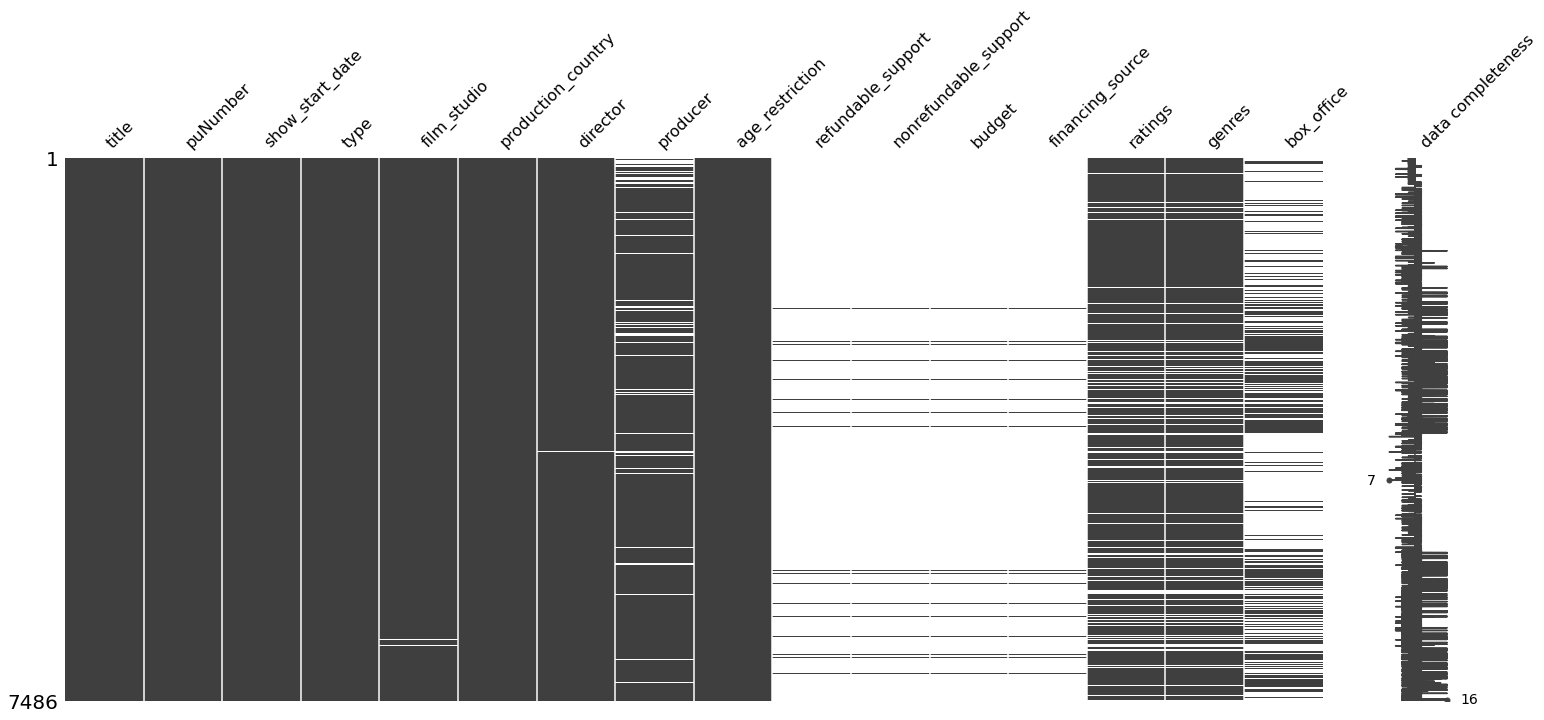

In [6]:
msno.matrix(merged_df, labels=True)

<AxesSubplot:>

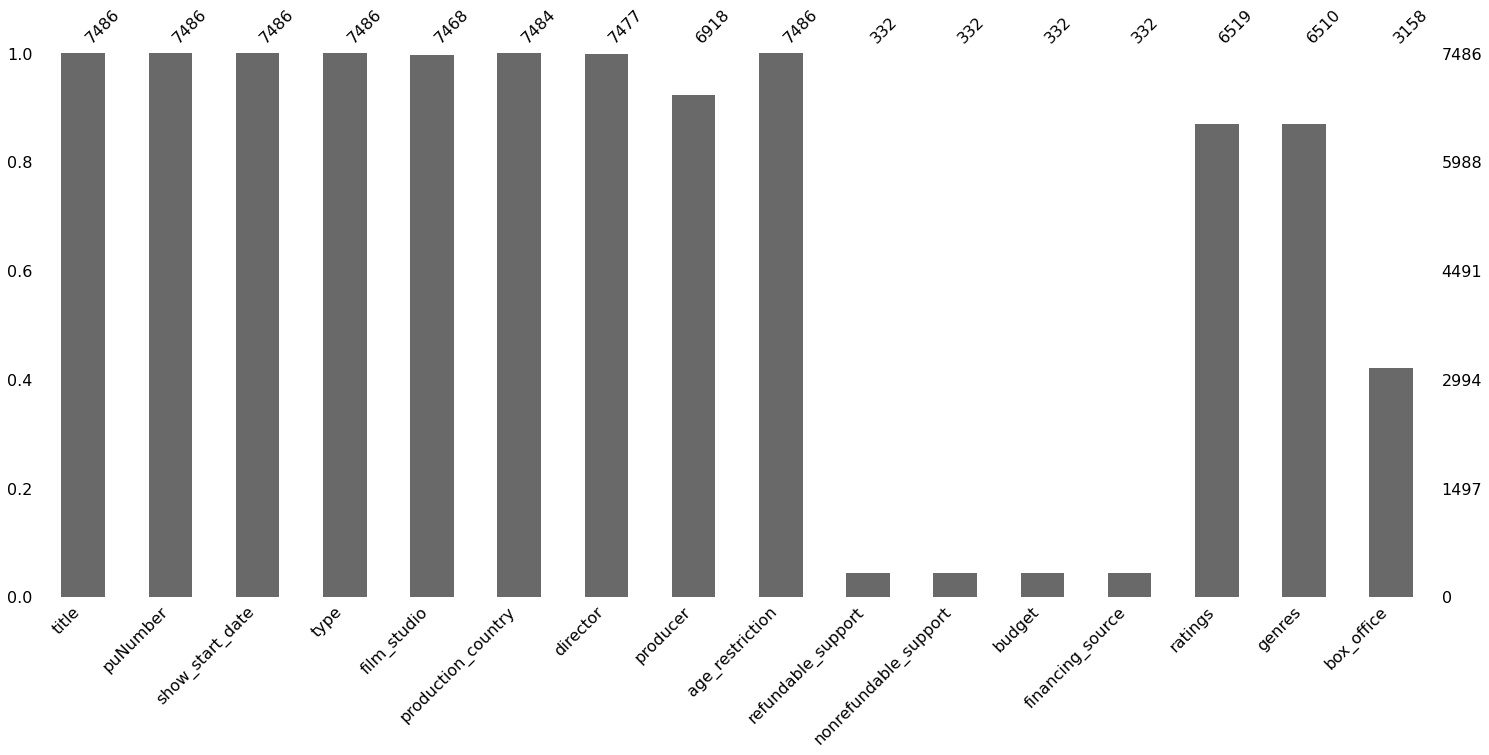

In [7]:
msno.bar(merged_df)


In [8]:
# Заполнение пропусков нулями для финансовых столбцов
merged_df['refundable_support'].fillna(0, inplace=True)
merged_df['nonrefundable_support'].fillna(0, inplace=True)
merged_df['budget'].fillna(0, inplace=True)
merged_df['box_office'].fillna(0, inplace=True)


<AxesSubplot:>

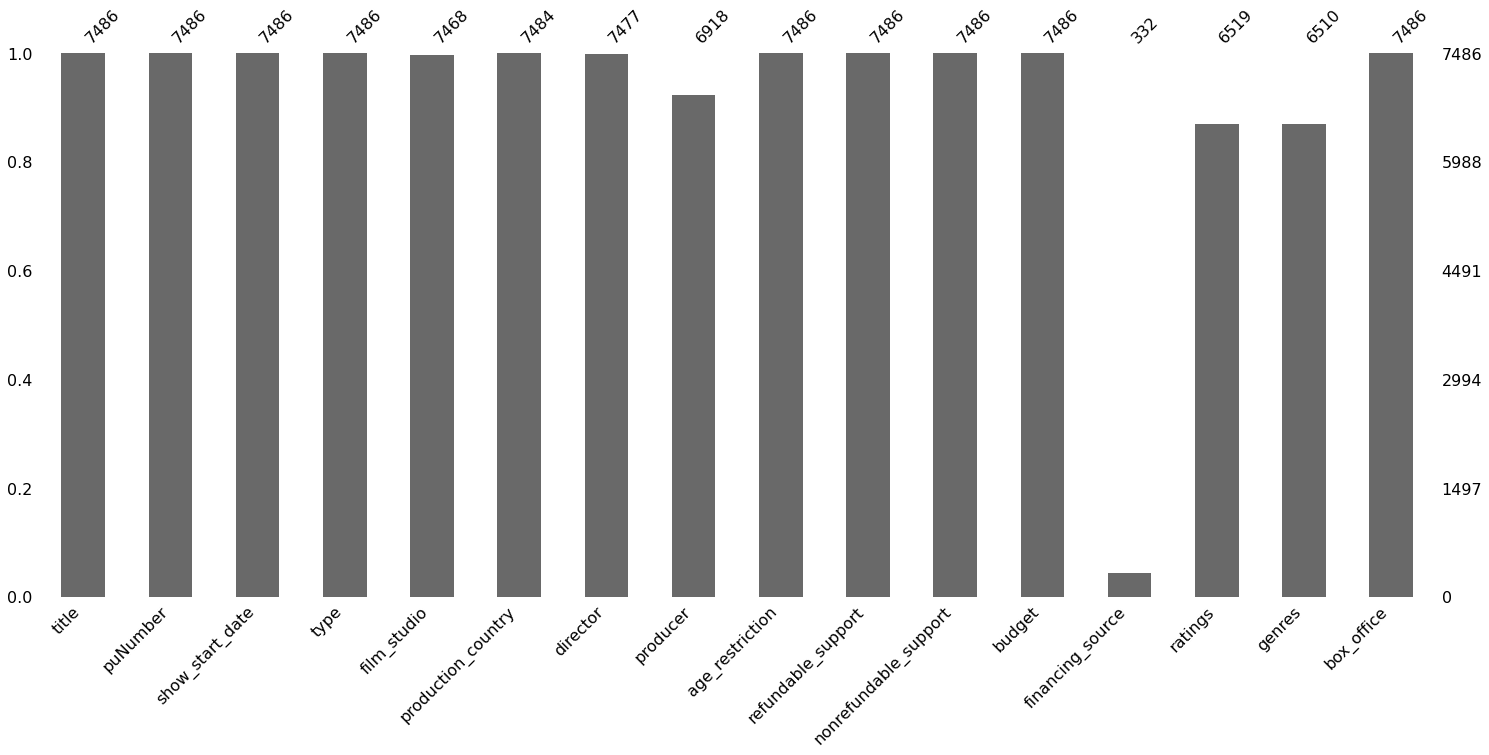

In [9]:
msno.bar(merged_df)

Заполнение пропусков нулями позволяет сохранить корректность данных, избегая введения ложной информации. Этот метод особенно уместен для финансовых данных, когда отсутствие значений можно трактовать как отсутствие финансирования или сборов.

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Для визуализации пропусков используй https://russianblogs.com/article/5001266235/

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
Обрати внимание, что нас просят добавить поясения почему мы заполнини определенным образом.

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2 
    
#### Успех
    
Вот так лучше 

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [10]:
# Проверка наличия дубликатов
duplicates = merged_df[merged_df.duplicated()]
print(f"Количество дубликатов: {len(duplicates)}")

# Проверка количества уникальных значений
unique_count = merged_df.drop_duplicates().shape[0]
print(f"Количество уникальных записей: {unique_count}")

Количество дубликатов: 0
Количество уникальных записей: 7486


In [11]:
# Получение общего количества строк
total_rows = len(merged_df)

# Проверка уникальных значений в каждом столбце
for column in merged_df.columns:
    unique_values = merged_df[column].nunique()
    print(f"Столбец '{column}': уникальных значений - {unique_values}, общее количество строк - {total_rows}")


Столбец 'title': уникальных значений - 6772, общее количество строк - 7486
Столбец 'puNumber': уникальных значений - 7484, общее количество строк - 7486
Столбец 'show_start_date': уникальных значений - 1965, общее количество строк - 7486
Столбец 'type': уникальных значений - 8, общее количество строк - 7486
Столбец 'film_studio': уникальных значений - 5490, общее количество строк - 7486
Столбец 'production_country': уникальных значений - 950, общее количество строк - 7486
Столбец 'director': уникальных значений - 4811, общее количество строк - 7486
Столбец 'producer': уникальных значений - 5349, общее количество строк - 7486
Столбец 'age_restriction': уникальных значений - 5, общее количество строк - 7486
Столбец 'refundable_support': уникальных значений - 34, общее количество строк - 7486
Столбец 'nonrefundable_support': уникальных значений - 75, общее количество строк - 7486
Столбец 'budget': уникальных значений - 290, общее количество строк - 7486
Столбец 'financing_source': уникаль

In [12]:
duplicates_by_key = merged_df.duplicated(subset=['puNumber', 'title', 'show_start_date'])
print(f"Количество дубликатов по ключевым столбцам: {duplicates_by_key.sum()}")


Количество дубликатов по ключевым столбцам: 0


<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
А почему другие столбцы на дубли не рассматриваем?

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2 
    
#### Успех
    
Вот тут отлично получилось

Рассматривая весь датафрейм на наличие дубликатов, несмотря на повторяющиеся названия фильмов, они имеют разные даты прокатов, которые удалять нет смысла.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [13]:
# Выбор категориальных столбцов (строковые данные)
categorical_columns = merged_df.select_dtypes(include=['object']).columns
categorical_columns

Index(['title', 'puNumber', 'type', 'film_studio', 'production_country',
       'director', 'producer', 'age_restriction', 'financing_source',
       'ratings', 'genres'],
      dtype='object')

In [14]:
# Уникальные значения для категориальных столбцов
for col in categorical_columns:
    print(f"Уникальные значения в столбце {col}:")
    print(merged_df[col].unique())
    print("\n")

Уникальные значения в столбце title:
['Открытый простор' 'Особо важное задание' 'Особо опасен' ...
 'Щенячий патруль: Скорей спешим на помощь!'
 'Машины песенки. Серия "Испанские мотивы"'
 'Машины песенки. Серия "Когда цветут кактусы"']


Уникальные значения в столбце puNumber:
['221048915' '111013716' '221038416' ... '124010819' '124010619'
 '124010719']


Уникальные значения в столбце type:
['Художественный' 'Анимационный' 'Прочие' 'Документальный'
 'Научно-популярный' ' Художественный' ' Анимационный'
 'Музыкально-развлекательный']


Уникальные значения в столбце film_studio:
['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз'
 'Киностудия "Мосфильм"'
 'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз'
 ...
 'Дэниел Гродник Продакшнз, Вандерфилм Медиа Корпорэйшн, Импринт Интертейнмент, Вор Хорс Интертейнмент, Пимиента '
 'Никелодеон Анимейшн Студиос, Спин Мастер'
 'Анимаккорд Лтд.

In [15]:
merged_df['production_country'] = merged_df['production_country'].str.strip()
merged_df['film_studio'] = merged_df['film_studio'].str.strip()
merged_df['type'] = merged_df['type'].str.strip()
for col in categorical_columns:
    print(f"Уникальные значения в столбце {col}:")
    print(merged_df[col].unique())
    print("\n")

Уникальные значения в столбце title:
['Открытый простор' 'Особо важное задание' 'Особо опасен' ...
 'Щенячий патруль: Скорей спешим на помощь!'
 'Машины песенки. Серия "Испанские мотивы"'
 'Машины песенки. Серия "Когда цветут кактусы"']


Уникальные значения в столбце puNumber:
['221048915' '111013716' '221038416' ... '124010819' '124010619'
 '124010719']


Уникальные значения в столбце type:
['Художественный' 'Анимационный' 'Прочие' 'Документальный'
 'Научно-популярный' 'Музыкально-развлекательный']


Уникальные значения в столбце film_studio:
['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз'
 'Киностудия "Мосфильм"'
 'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз'
 ...
 'Дэниел Гродник Продакшнз, Вандерфилм Медиа Корпорэйшн, Импринт Интертейнмент, Вор Хорс Интертейнмент, Пимиента'
 'Никелодеон Анимейшн Студиос, Спин Мастер'
 'Анимаккорд Лтд., ООО Студия "АНИМАККОРД"']


Уникал

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Скажи, а ты реально глазам просматриваешь такой длинный вывод категориальных значений?

Да стараюсь/пытаюсь разобраться в полученных данных насколько позволяют мне знания

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Так какая все же общая проблема есть у всех столбцов?

общей проблемой являлось наличие лишних пробелов в налаче и конце.

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [16]:
merged_df[['budget', 'refundable_support', 'nonrefundable_support']].head()


,budget,refundable_support,nonrefundable_support
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


In [17]:
# Проверка на пропущенные значения
print(merged_df[['budget', 'refundable_support', 'nonrefundable_support']].isnull().sum())

# Получение статистики по столбцам
print(merged_df[['budget', 'refundable_support', 'nonrefundable_support']].describe())

budget                   0
refundable_support       0
nonrefundable_support    0
dtype: int64
             budget  refundable_support  nonrefundable_support
count  7.486000e+03        7.486000e+03           7.486000e+03
mean   5.642568e+06        5.261822e+05           2.172280e+06
std    4.752818e+07        5.781108e+06           1.614894e+07
min    0.000000e+00        0.000000e+00           0.000000e+00
25%    0.000000e+00        0.000000e+00           0.000000e+00
50%    0.000000e+00        0.000000e+00           0.000000e+00
75%    0.000000e+00        0.000000e+00           0.000000e+00
max    2.305074e+09        1.800000e+08           4.000000e+08


In [18]:
# Проверка на отрицательные значения
print(merged_df[merged_df[['budget', 'refundable_support', 'nonrefundable_support']] < 0].count())

title                    0
puNumber                 0
show_start_date          0
type                     0
film_studio              0
production_country       0
director                 0
producer                 0
age_restriction          0
refundable_support       0
nonrefundable_support    0
budget                   0
financing_source         0
ratings                  0
genres                   0
box_office               0
dtype: int64


In [19]:
# Проверка суммы refundable_support и nonrefundable_support относительно budget
merged_df['total_support'] = merged_df['refundable_support'] + merged_df['nonrefundable_support']
merged_df['budget_check'] = merged_df['total_support'] <= merged_df['budget']

# Вывод строк, где сумма поддержек превышает бюджет
merged_df[~merged_df['budget_check']]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,total_support,budget_check
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07,23000000.0,False
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,4.461635e+08,75000000.0,False
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08,80000000.0,False
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07,20000000.0,False
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08,160000000.0,False
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59000000.0,0.0,Фонд кино,6.3,"комедия,драма",1.957739e+06,59000000.0,False
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,0.0,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07,35000000.0,False
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,0.0,Министерство культуры,4.3,комедия,1.536293e+07,6000000.0,False
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07,70000000.0,False
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,0.0,Фонд кино,5.6,фантастика,1.038321e+09,250000000.0,False


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Таких значений оказалось совсем немного. Здорово вышло

In [20]:
# Удаление строк с аномальными значениями
merged_df_cleaned = merged_df[merged_df['budget_check']].copy()

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [21]:
merged_df['show_start_date'] = pd.to_datetime(merged_df['show_start_date'])

# Создание нового столбца с годом проката
merged_df['show_release_year'] = merged_df['show_start_date'].dt.year

# Просмотр первых строк DataFrame, чтобы убедиться, что новый столбец добавлен
merged_df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,total_support,budget_check,show_release_year
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.0,0.0,0.0,NaN,7.2,"боевик,драма,мелодрама",0.0,0.0,True,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,0.0,0.0,0.0,NaN,6.6,"драма,военный",0.0,0.0,True,2016
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,NaN,6.8,"фантастика,боевик,триллер",0.0,0.0,True,2016
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,NaN,6.8,"фантастика,боевик,триллер",0.0,0.0,True,2016
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,NaN,6.8,"фантастика,боевик,триллер",0.0,0.0,True,2015


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Сам люблю подобный метод перевода выделения временного отрезка из даты

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [22]:
def extract_first_director(director_list):
    if isinstance(director_list, str):  # Check if the value is a string
        return director_list.split(',')[0].strip()
    return None  # Or some default value if it's not a string

def extract_genre(genre_list):
    if isinstance(genre_list, str):  # Check if the value is a string
        return genre_list.split(',')[0].strip()
    return None  # Or some default value if it's not a string

# применить функцию к столбцам
merged_df['main_director'] = merged_df['director'].apply(extract_first_director)
merged_df['main_genre'] = merged_df['genres'].apply(extract_genre)

merged_df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,total_support,budget_check,show_release_year,main_director,main_genre
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.0,...,0.0,NaN,7.2,"боевик,драма,мелодрама",0.0,0.0,True,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,0.0,...,0.0,NaN,6.6,"драма,военный",0.0,0.0,True,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,...,0.0,NaN,6.8,"фантастика,боевик,триллер",0.0,0.0,True,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,...,0.0,NaN,6.8,"фантастика,боевик,триллер",0.0,0.0,True,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,...,0.0,NaN,6.8,"фантастика,боевик,триллер",0.0,0.0,True,2015,Тимур Бекмамбетов,фантастика


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Достаточно простая, но работоспособная функция вышла 

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [23]:
# Убедитесь, что значения в столбцах являются числами, и замените возможные NaN на 0
merged_df['budget'] = pd.to_numeric(merged_df['budget'], errors='coerce').fillna(0)
merged_df['refundable_support'] = pd.to_numeric(merged_df['refundable_support'], errors='coerce').fillna(0)

# Рассчитайте долю государственной поддержки от общего бюджета
merged_df['support_fraction'] = merged_df['refundable_support'] / merged_df['budget']

# Просмотрите результат
print(merged_df[['budget', 'refundable_support', 'support_fraction']].head())

   budget  refundable_support  support_fraction
0     0.0                 0.0               NaN
1     0.0                 0.0               NaN
2     0.0                 0.0               NaN
3     0.0                 0.0               NaN
4     0.0                 0.0               NaN


<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
Вот тут не хватает промежуточного вывода по итогу Предобработки

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2 
    
#### Успех
    
Спасибо за такие подробные выводы

Обоснование заполнения нулями:
Отсутствие поддержки или проката:

Пропуски в столбцах, таких как refundable_support, nonrefundable_support, и box_office, скорее всего означают, что фильм не получил государственной поддержки или не был в прокате.
Заполнение нулями здесь является логичным, так как эти фильмы просто не имели данных показателей (не было финансирования или проката). Подставлять средние или медианные значения было бы некорректно, так как это привнесло бы ложную информацию о якобы существующих финансах или сборах.
Предотвращение искажения данных:

Заполнение пропусков средними или медианными значениями может исказить данные, так как это бы привело к увеличению финансовых показателей у фильмов, которые не имели финансирования или проката. Это могло бы искусственно увеличить средние значения бюджетов или сборов, что в конечном итоге исказило бы общий анализ данных.
Логичное представление отсутствующих данных:

Финансовые данные, такие как государственная поддержка и кассовые сборы, имеют естественное значение "0", если фильм не получал поддержки или не участвовал в прокате. Пропуск в данных в таком случае лучше интерпретировать как отсутствие этих показателей, что и делает заполнение нулями наиболее разумным выбором.

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.

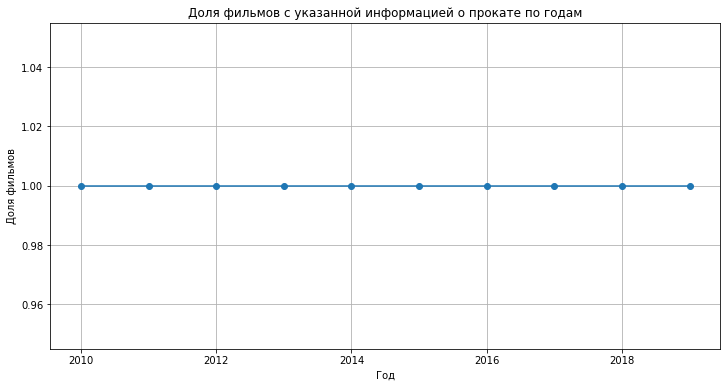

Годы с наибольшей долей информации о прокате:
2010 1.0
Годы с наименьшей долей информации о прокате:
2010 1.0


In [24]:
# Предположим, что наличие данных в столбцах box_office или total_support указывает на прокат
merged_df['has_theatrical_release'] = merged_df['box_office'].notna() | merged_df['total_support'].notna()

# Количество фильмов по годам
total_movies_per_year = merged_df.groupby('show_release_year').size()

# Количество фильмов с указанной информацией о прокате
theatrical_movies_per_year = merged_df[merged_df['has_theatrical_release']].groupby('show_release_year').size()

# Рассчитайте долю фильмов с указанной информацией о прокате
support_fraction_per_year = theatrical_movies_per_year / total_movies_per_year

plt.figure(figsize=(12, 6))
support_fraction_per_year.plot(kind='line', marker='o')
plt.title('Доля фильмов с указанной информацией о прокате по годам')
plt.xlabel('Год')
plt.ylabel('Доля фильмов')
plt.grid(True)
plt.show()

# Выведите годы с наибольшей и наименьшей долей информации о прокате
print("Годы с наибольшей долей информации о прокате:")
print(support_fraction_per_year.idxmax(), support_fraction_per_year.max())

print("Годы с наименьшей долей информации о прокате:")
print(support_fraction_per_year.idxmin(), support_fraction_per_year.min())

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Импорт библиотек старайся делать в самом начале проекта в общей ячейке кода

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

Год с минимальными сборами: 2010, Сборы: 2428654.0
Год с максимальными сборами: 2018, Сборы: 49668403134.31999


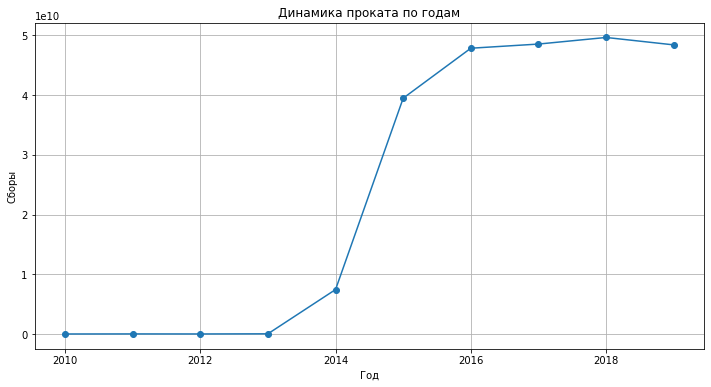

In [29]:
# Группируем данные по годам и суммируем сборы
total_box_office_per_year = merged_df.groupby('show_release_year')['box_office'].sum()
# Найти год с минимальными и максимальными сборами
year_min_box_office = total_box_office_per_year.idxmin()
min_box_office = total_box_office_per_year.min()

year_max_box_office = total_box_office_per_year.idxmax()
max_box_office = total_box_office_per_year.max()

# Выводим результаты
print(f"Год с минимальными сборами: {year_min_box_office}, Сборы: {min_box_office}")
print(f"Год с максимальными сборами: {year_max_box_office}, Сборы: {max_box_office}")

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
total_box_office_per_year.plot(kind='line', marker='o')
plt.title('Динамика проката по годам')
plt.xlabel('Год')
plt.ylabel('Сборы')
plt.grid(True)
plt.show()

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
Все здорово, получилось по графику, но нужно не забывать добавлять выводы. Мы же графики как раз и делаем ради выводов. 

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2 
    
#### Успех
    
Идеально и здесь у тебя вышло

Выводы
Год с минимальными сборами — 2010. В 2010 году сумма сборов в кинотеатрах составила всего 2,428,654 рублей. Это может быть связано с несколькими факторами:

В 2010 году могло выйти меньше крупных блокбастеров.
Возможное падение интереса аудитории к кинопрокату в этот год.
Экономическая ситуация или изменения в индустрии развлечений могли повлиять на посещаемость кинотеатров.
Год с максимальными сборами — 2018. В 2018 году наблюдался рекордный рост сборов — 49,668,403,134 рублей. Это может быть результатом нескольких факторов:

Выход крупных, высокобюджетных фильмов, которые собрали большую кассу (в том числе фильмы с международной дистрибуцией).
В этот период индустрия кинотеатров, вероятно, развивалась, появлялись новые кинотеатры и увеличивалась посещаемость.
Улучшение качества фильмов и развитие технологий (например, распространение 3D-кино) могло привлечь больше зрителей.
Государственная поддержка и другие факторы могли способствовать росту интереса к отечественному кинематографу.
Таким образом, данные о сборах показывают значительные колебания в кинопрокате по годам, с резким ростом в 2018 году, что, вероятно, связано с успешными фильмами и улучшением киноиндустрии.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [26]:
pivot_table = pd.pivot_table(
    merged_df,
    values='box_office',
    index='show_release_year',
    aggfunc={'box_office': ['mean', 'median']}
)

# Переименуем колонки для удобства
pivot_table.columns = ['average_box_office', 'median_box_office']

# Выводим результат
pivot_table

,average_box_office,median_box_office
show_release_year,,
2010,2.465639e+03,0.0
2011,2.267326e+04,0.0
2012,1.172921e+04,0.0
2013,4.730112e+04,0.0
2014,9.225467e+06,0.0
2015,5.602463e+07,739938.0
2016,5.851626e+07,479832.5
2017,9.616576e+07,2522174.0
2018,5.574456e+07,289040.0


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Медианные показатели сборов достаточно ниже средних. 

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [27]:
# Фильтруем данные по годам
filtered_df = merged_df[(merged_df['show_release_year'] >= 2015) & (merged_df['show_release_year'] <= 2019)]
# Создаем сводную таблицу
pivot_table_age = pd.pivot_table(
    filtered_df,
    values='box_office',
    index=['show_release_year', 'age_restriction'],
    aggfunc=['mean', 'sum']
)

# Переименуем колонки для удобства
pivot_table_age.columns = ['average_box_office', 'total_box_office']

# Выводим результат
pivot_table_age

average_box_office  \
show_release_year age_restriction                                              
2015              «0+» - для любой зрительской аудитории        7.581092e+06   
                  «12+» - для детей старше 12 лет               9.938746e+07   
                  «16+» - для детей старше 16 лет               4.565510e+07   
                  «18+» - запрещено для детей                   2.829327e+07   
                  «6+» - для детей старше 6 лет                 1.130104e+08   
2016              «0+» - для любой зрительской аудитории        2.057929e+06   
                  «12+» - для детей старше 12 лет               8.973858e+07   
                  «16+» - для детей старше 16 лет               6.194999e+07   
                  «18+» - запрещено для детей                   2.773033e+07   
                  «6+» - для детей старше 6 лет                 1.268752e+08   
2017              «0+» - для любой зрительской аудитории        5.218158e+06   
                  «12+» - для детей старше 12 лет               1.121633e+08   
                  «16+» - для детей старше 16 лет               1.225166e+08   
                  «18+» - запрещено для детей                   5.611335e+07   
                  «6+» - для детей старше 6 лет                 1.831234e+08   
2018              «0+» - для любой зрительской аудитории        4.214156e+05   
                  «12+» - для детей старше 12 лет               5.871313e+07   
                  «16+» - для детей старше 16 лет               7.022810e+07   
                  «18+» - запрещено для детей                   3.945984e+07   
                  «6+» - для детей старше 6 лет                 8.864013e+07   
2019              «0+» - для любой зрительской аудитории        2.430968e+05   
                  «12+» - для детей старше 12 лет               6.246403e+07   
                  «16+» - для детей старше 16 лет               4.794518e+07   
                  «18+» - запрещено для детей                   3.969332e+07   
                  «6+» - для детей старше 6 лет                 9.663570e+07   

                                                          total_box_office  
show_release_year age_restriction                                           
2015              «0+» - для любой зрительской аудитории      3.790546e+08  
                  «12+» - для детей старше 12 лет             1.361608e+10  
                  «16+» - для детей старше 16 лет             1.136812e+10  
                  «18+» - запрещено для детей                 5.432308e+09  
                  «6+» - для детей старше 6 лет               8.701799e+09  
2016              «0+» - для любой зрительской аудитории      1.502288e+08  
                  «12+» - для детей старше 12 лет             1.220445e+10  
                  «16+» - для детей старше 16 лет             1.666455e+10  
                  «18+» - запрещено для детей                 6.793930e+09  
                  «6+» - для детей старше 6 лет               1.205315e+10  
2017              «0+» - для любой зрительской аудитории      2.295989e+08  
                  «12+» - для детей старше 12 лет             7.851428e+09  
                  «16+» - для детей старше 16 лет             1.874504e+10  
                  «18+» - запрещено для детей                 9.651496e+09  
                  «6+» - для детей старше 6 лет               1.208614e+10  
2018              «0+» - для любой зрительской аудитории      3.244900e+07  
                  «12+» - для детей старше 12 лет             1.426729e+10  
                  «16+» - для детей старше 16 лет             1.650360e+10  
                  «18+» - запрещено для детей                 8.760086e+09  
                  «6+» - для детей старше 6 лет               1.010497e+10  
2019              «0+» - для любой зрительской аудитории      1.774607e+07  
                  «12+» - для детей старше 12 лет             1.268020e+10  
                  «16+» - для детей старше 16 лет

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Для восприятия результата не хватает графика

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

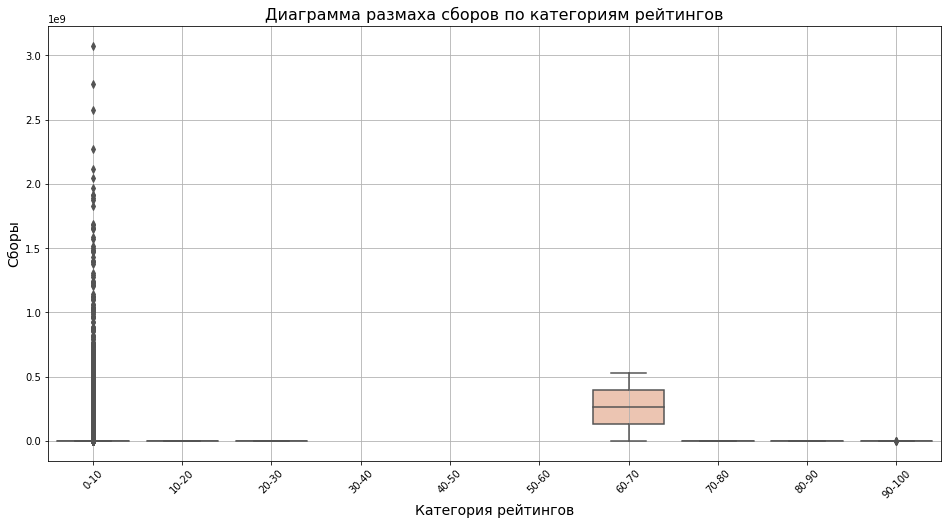

In [41]:
# Очистка и преобразование данных
def clean_ratings(value):
    try:
        return float(value.strip('%'))
    except:
        return None

# Применяем функцию очистки к столбцу 'ratings'
merged_df['ratings_clean'] = merged_df['ratings'].apply(clean_ratings)

# Удаляем строки с некорректными значениями в 'ratings_clean'
merged_df = merged_df.dropna(subset=['ratings_clean'])

# Определяем диапазоны и метки для категорий
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

# Создаем категории для рейтингов
merged_df['rating_category'] = pd.cut(merged_df['ratings_clean'], bins=bins, labels=labels, right=False)

# Постройте диаграмму размаха для сборов по категориям рейтингов
plt.figure(figsize=(16, 8))  # Увеличиваем размер графика

# Используем seaborn для построения диаграммы размаха
sns.boxplot(x='rating_category', y='box_office', data=merged_df, palette='coolwarm')

plt.title('Диаграмма размаха сборов по категориям рейтингов', fontsize=16)
plt.xlabel('Категория рейтингов', fontsize=14)
plt.ylabel('Сборы', fontsize=14)
plt.xticks(rotation=45)  # Повернуть метки по оси x, если необходимо
plt.grid(True)
plt.show()


<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
А график точно надо поправить. Не должны так подписи накладываться друг на друга

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2 
    
#### Успех
    
Ну и тут больше не чего добавить. Молодец

### Шаг 5. Напишите общий вывод

Проведенный анализ данных о российском кинопрокате выявил несколько ключевых закономерностей. В частности, была обнаружена значительная связь между государственной поддержкой и бюджетом фильмов, а также влияние возрастных рейтингов на сборы. Выявленные тенденции в динамике проката и изменениях по годам помогают лучше понять, какие факторы влияют на финансовый успех фильмов и как лучше планировать поддержку киноиндустрии.

Для дальнейшего улучшения анализа рекомендуется:

Углубить исследование по влиянию жанров на сборы.
Провести дополнительный анализ факторов, способствующих успешности фильмов в разные годы.
Рассмотреть влияние маркетинговых стратегий и других внешних факторов на сборы.
Этот подход поможет более точно предсказать успешность фильмов и оптимизировать распределение государственной поддержки в будущем.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Итоговый вывод получился достаточно хорошим завершением проекта. С такими данными нам точно хватит инсайтов на составление представления о рынке кино для Министерства Культуры.

<div class="alert alert-block alert-info">
 
### Итоговый Комментарий ревьюера
    
#### Успех
    
Спасибо тебе за работу. В целом, мне кажется с прошлой работы заметен прогресс, но есть еще части, которые точно стоит улучшить. Давай попробуем по порядку:
   

* Выводы промежуточные добавить.
* Рассмотреть дубликаты в других столбцах. 
* Пояснить проработку пропусков.
* Графики подправить.
* Выводы под графики добавить.
       
Еще я оставил рекомендации. Очень надеюсь, что ты учтешь их в этом и последующих проектах.
       
Жду проект после доработки. Уверен, ты справишься.
</div>

<div class="alert alert-block alert-success">
 
# Итоговый Комментарий ревьюера ver.2 
    
#### Успех
    
Спасибо большое за дорабокту проекта. Вот теперь я его готов принять. От себя я хочу пожелать успехов в дальнешей учебе. Ты точно справишься и дальше, я уверен. 